In [1]:
import xtrack as xt
import numpy as np
import matplotlib.pyplot as plt

from xnlbd.visualise.orbits import get_orbit_points

# uniform distribution in x, rest at 0

In [17]:
line = xt.Line.from_json('injection_lines/injection_thin_approx_ap2.json')
tw = line.twiss()
N_part = 100
N_turn = 1000


Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           


In [18]:
part = xt.Particles(
    x = np.linspace(-40e-3, 40e-3, N_part), #np.ones(N_part) * tw.particle_on_co.x[0], #np.linspace(-40e-3, 40e-3, N_part),
    px = np.ones(N_part) * tw.particle_on_co.px[0],
    y = np.ones(N_part) * tw.particle_on_co.y[0],
    py = np.ones(N_part) * tw.particle_on_co.py[0],
    delta = np.ones(N_part) * tw.particle_on_co.delta[0],#np.linspace(-5e-3, 5e-3, N_part), #np.ones(N_part) * tw.particle_on_co.delta[0],
    zeta = np.ones(N_part) * tw.particle_on_co.zeta[0],
    p0c = np.ones(N_part) * tw.particle_on_co.p0c[0],
)

In [19]:
monitor_1 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

monitor_2 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

In [ ]:
idx_1 = 5190
idx_2 = 12671

line.discard_tracker()
line.insert_element(
    name="monit1", 
    element=monitor_1, 
    at=idx_1+1
)

line.insert_element(
    name="monit2", 
    element=monitor_2, 
    at=idx_2+2
)
line.build_tracker()

In [24]:
line.track(
    part, 
    num_turns=N_turn,
    with_progress=True
)

Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

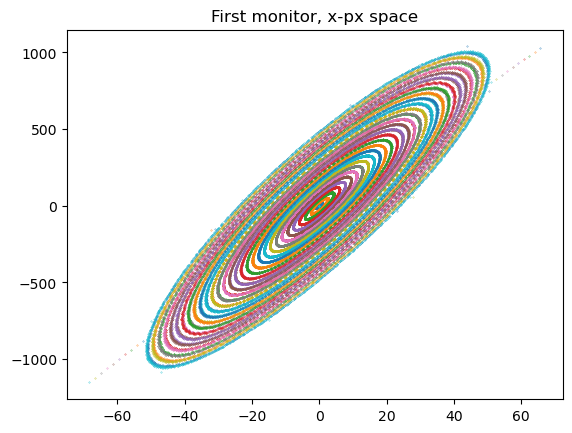

In [26]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.x[i, :] * 1e3,
        monitor_1.px[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, x-px space')
plt.show()

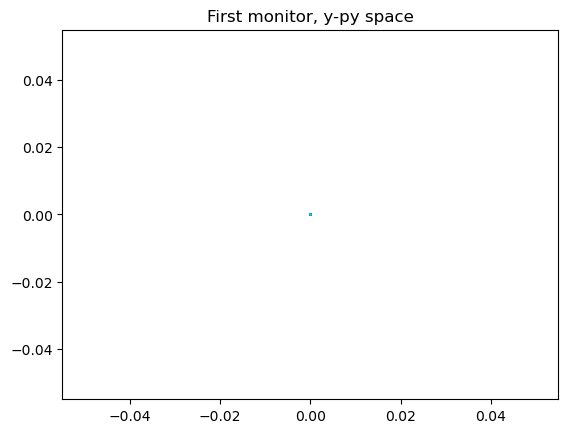

In [27]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.y[i, :] * 1e3,
        monitor_1.py[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, y-py space')
plt.show()

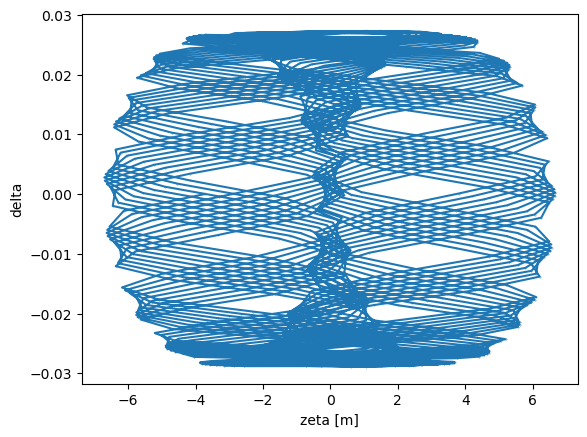

In [28]:
plt.figure()
for i in range(22, 23):#N_part):
    plt.plot(
        monitor_1.zeta[i, :]*1e3,
        monitor_1.delta[i, :]*1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='-'
    )
plt.xlabel('zeta [m]')
plt.ylabel('delta')
plt.savefig('delta_vs_zeta.png')
plt.show()

# Large bucket, x, px, y, py at zero

In [29]:
line = xt.Line.from_json('injection_lines/injection_thin_approx_ap2.json')
tw = line.twiss()
N_part = 100
N_turn = 1000

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           


In [30]:
part = xt.Particles(
    x = np.ones(N_part) * tw.particle_on_co.x[0], #np.linspace(-40e-3, 40e-3, N_part),
    px = np.ones(N_part) * tw.particle_on_co.px[0],
    y = np.ones(N_part) * tw.particle_on_co.y[0],
    py = np.ones(N_part) * tw.particle_on_co.py[0],
    delta = np.linspace(-5e-3, 5e-3, N_part), #np.ones(N_part) * tw.particle_on_co.delta[0],
    zeta = np.ones(N_part) * tw.particle_on_co.zeta[0],
    p0c = np.ones(N_part) * tw.particle_on_co.p0c[0],
)

In [31]:
monitor_1 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

monitor_2 = xt.ParticlesMonitor(_context=line._context,
    num_particles=N_part,
    start_at_turn=0, # <-- first turn to monitor (including)
    stop_at_turn=N_turn, # <-- last turn to monitor (excluding)
)

In [32]:
idx_1 = 5190
idx_2 = 12671

line.discard_tracker()
line.insert_element(
    name="monit1", 
    element=monitor_1, 
    at=idx_1+1
)

line.insert_element(
    name="monit2", 
    element=monitor_2, 
    at=idx_2+2
)
line.build_tracker()

In [33]:
line.track(
    part, 
    num_turns=N_turn,
    with_progress=True
)

Tracking:   0%|          | 0/1000 [00:00<?, ?it/s]

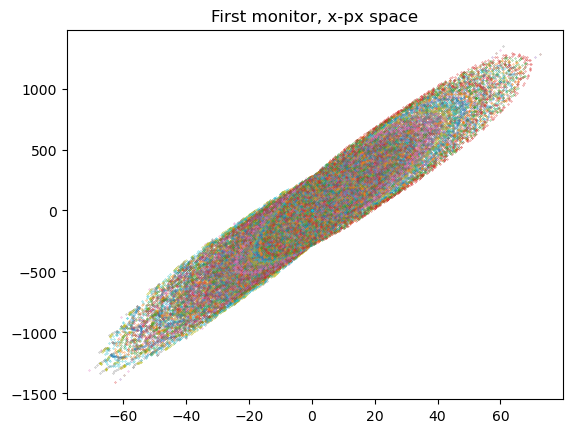

In [34]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.x[i, :] * 1e3,
        monitor_1.px[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, x-px space')
plt.show()

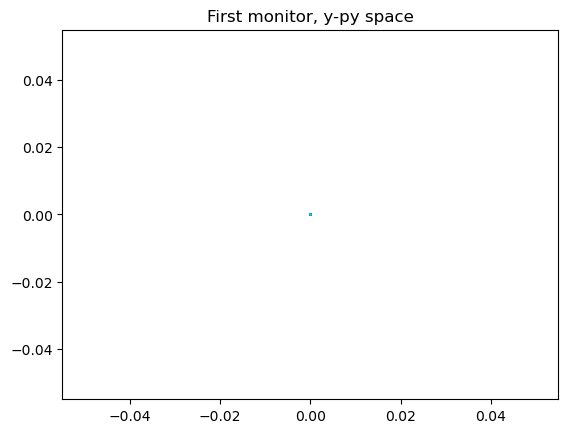

In [35]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.y[i, :] * 1e3,
        monitor_1.py[i, :] * 1e6,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.title('First monitor, y-py space')
plt.show()

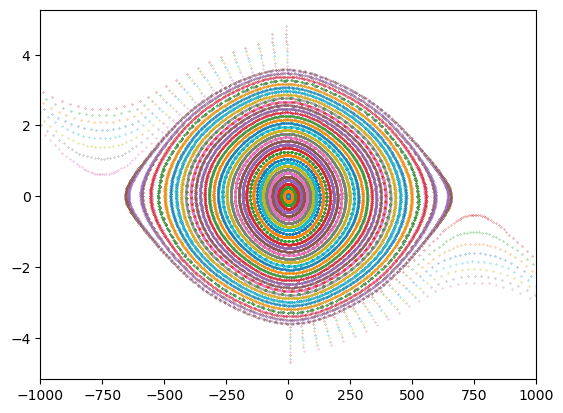

In [36]:
plt.figure()
for i in range(N_part):
    plt.plot(
        monitor_1.zeta[i, :] * 1e3,
        monitor_1.delta[i, :] * 1e3,
        # color='black', 
        marker='.', 
        markersize=0.5,
        linestyle='None'
    )
plt.xlim((-1000, 1000))
plt.show()